#Data Science in Marketing: Customer Segmentation
Tujuan melakukan Customer Segmentation untuk lebih mengenal pelanggan supaya perusahaan dapat menyusun pesan pemasaran yang lebih sesuai dengan preferensi setiap pelanggan, menghasilkan interaksi yang lebih personal. Hal ini memungkinkan pemahaman yang lebih mendalam terhadap pelanggan secara individual, memungkinkan perusahaan untuk memahami kebutuhan dan preferensi pelanggan secara lebih baik. Dampaknya adalah penurunan biaya pemasaran, karena strategi yang lebih terarah dan efektif dapat diterapkan, mengurangi pengeluaran yang tidak perlu untuk target yang tidak sesuai.

In [1]:
# Get the data
pelanggan <- read.csv("https://academy.dqlab.id/dataset/customer_segments.txt", sep="\t")
head(pelanggan)

,Customer_ID,Nama.Pelanggan,Jenis.Kelamin,Umur,Profesi,Tipe.Residen,NilaiBelanjaSetahun
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
1,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927
2,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700
3,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429
4,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498
5,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206
6,CUST-006,Rosalina Kurnia,Wanita,24,Professional,Cluster,5215541


In [6]:
install.packages("ggplot2")
install.packages("tidyverse")

also installing the dependencies 'lattice', 'colorspace', 'nlme', 'Matrix', 'farver', 'labeling', 'munsell', 'R6', 'RColorBrewer', 'viridisLite', 'magrittr', 'pkgconfig', 'gtable', 'isoband', 'MASS', 'mgcv', 'scales', 'tibble', 'withr'





  There are binary versions available but the source versions are later:
              binary  source needs_compilation
lattice       0.21-8  0.22-5              TRUE
nlme         3.1-162 3.1-164              TRUE
Matrix         1.5-4   1.6-3              TRUE
labeling       0.4.2   0.4.3             FALSE
viridisLite    0.4.1   0.4.2             FALSE
gtable         0.3.3   0.3.4             FALSE
MASS        7.3-58.3  7.3-60              TRUE
mgcv          1.8-42   1.9-0              TRUE
scales         1.2.1   1.3.0              TRUE
withr          2.5.0   2.5.2             FALSE
ggplot2        3.4.2   3.4.4             FALSE

  Binaries will be installed
package 'lattice' successfully unpacked and MD5 sums checked
package 'colorspace' successfully unpacked and MD5 sums checked
package 'nlme' successfully unpacked and MD5 sums checked
package 'Matrix' successfully unpacked and MD5 sums checked
package 'farver' successfully unpacked and MD5 sums checked
package 'munsell' successfull

installing the source packages 'labeling', 'viridisLite', 'gtable', 'withr', 'ggplot2'


also installing the dependencies 'sys', 'bit', 'ps', 'sass', 'cachem', 'rappdirs', 'rematch', 'askpass', 'bit64', 'prettyunits', 'processx', 'highr', 'xfun', 'yaml', 'bslib', 'fontawesome', 'jquerylib', 'tinytex', 'backports', 'generics', 'memoise', 'blob', 'DBI', 'tidyselect', 'data.table', 'gargle', 'cellranger', 'curl', 'ids', 'rematch2', 'cpp11', 'mime', 'openssl', 'timechange', 'systemfonts', 'textshaping', 'clipr', 'vroom', 'tzdb', 'progress', 'callr', 'fs', 'knitr', 'rmarkdown', 'selectr', 'stringi', 'broom', 'conflicted', 'dbplyr', 'dplyr', 'dtplyr', 'forcats', 'googledrive', 'googlesheets4', 'haven', 'hms', 'httr', 'lubridate', 'modelr', 'purrr', 'ragg', 'readr', 'readxl', 'reprex', 'rstudioapi', 'rvest', 'stringr', 'tidyr', 'xml2'





  There are binary versions available but the source versions are later:
              binary source needs_compilation
sys            3.4.1  3.4.2              TRUE
sass           0.4.5  0.4.7              TRUE
cachem         1.0.7  1.0.8              TRUE
rematch        1.0.1  2.0.0             FALSE
askpass          1.1  1.2.0              TRUE
prettyunits    1.1.1  1.2.0             FALSE
processx       3.8.1  3.8.2              TRUE
xfun            0.39   0.41              TRUE
bslib          0.4.2  0.6.1             FALSE
fontawesome    0.5.1  0.5.2             FALSE
tinytex         0.45   0.49             FALSE
gargle         1.4.0  1.5.2             FALSE
curl           5.0.0  5.1.0              TRUE
cpp11          0.4.3  0.4.6             FALSE
openssl        2.0.6  2.1.1              TRUE
systemfonts    1.0.4  1.0.5              TRUE
textshaping    0.3.6  0.3.7              TRUE
vroom          1.6.1  1.6.4              TRUE
tzdb           0.3.0  0.4.0              TRUE
fs    

installing the source packages 'rematch', 'prettyunits', 'bslib', 'fontawesome', 'tinytex', 'gargle', 'cpp11', 'knitr', 'rmarkdown', 'broom', 'dbplyr', 'googledrive', 'googlesheets4', 'httr', 'rstudioapi', 'stringr'




-- Attaching core tidyverse packages ------------------------------------------------------------------------------ tidyverse 2.0.0 --
v dplyr     1.1.2     v readr     2.1.4
v forcats   1.0.0     v stringr   1.5.1
v lubridate 1.9.2     v tibble    3.2.1
v purrr     1.0.1     v tidyr     1.3.0
-- Conflicts ------------------------------------------------------------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


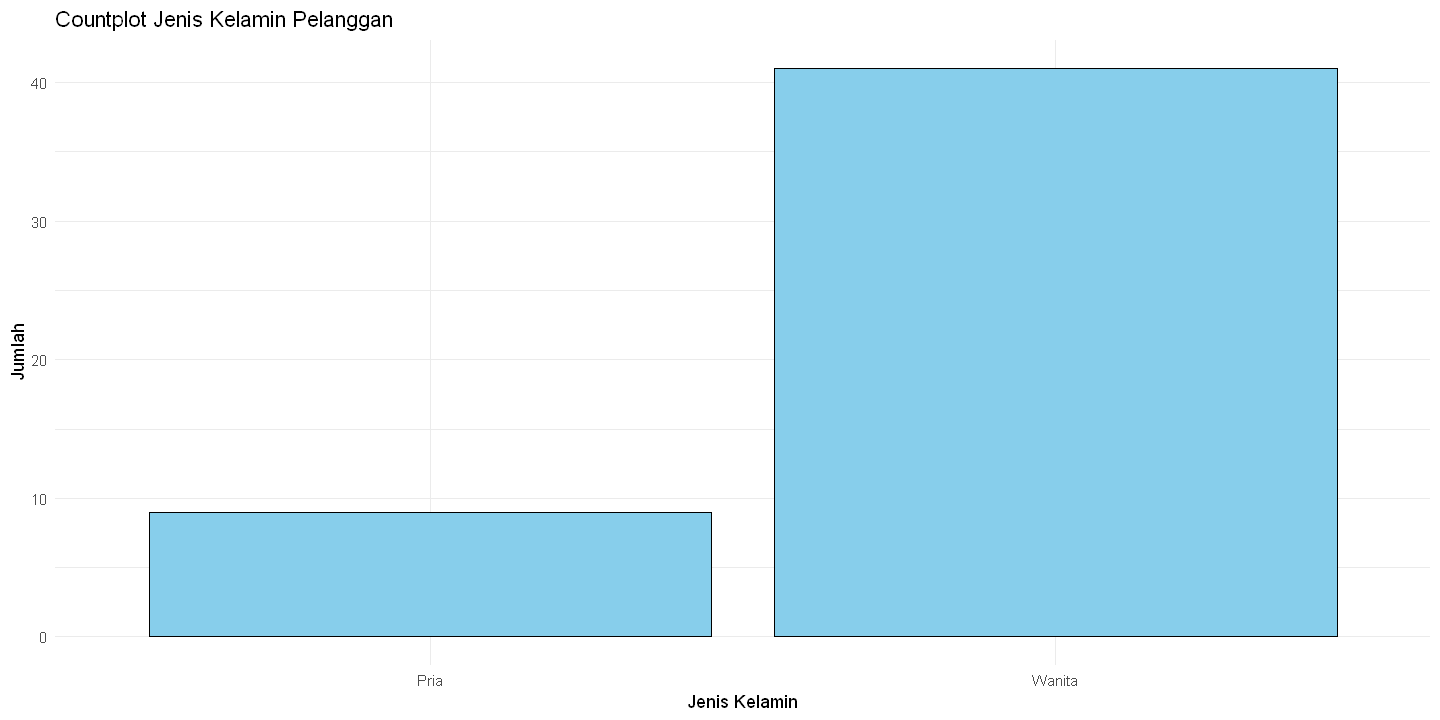

In [7]:
library(ggplot2)
library(tidyverse)

options(repr.plot.width=12, repr.plot.height=6)
# Plot Jenis Kelamin
pelanggan %>%
  ggplot(aes(x = Jenis.Kelamin)) +
  geom_bar(fill = "skyblue", color = "black") +
  labs(title = "Countplot Jenis Kelamin Pelanggan", x = "Jenis Kelamin", y = "Jumlah") +
  theme_minimal()

Sebagian besar di dominasi oleh kelamin wanita sebanyak 41 dan pria sebanyak 9.

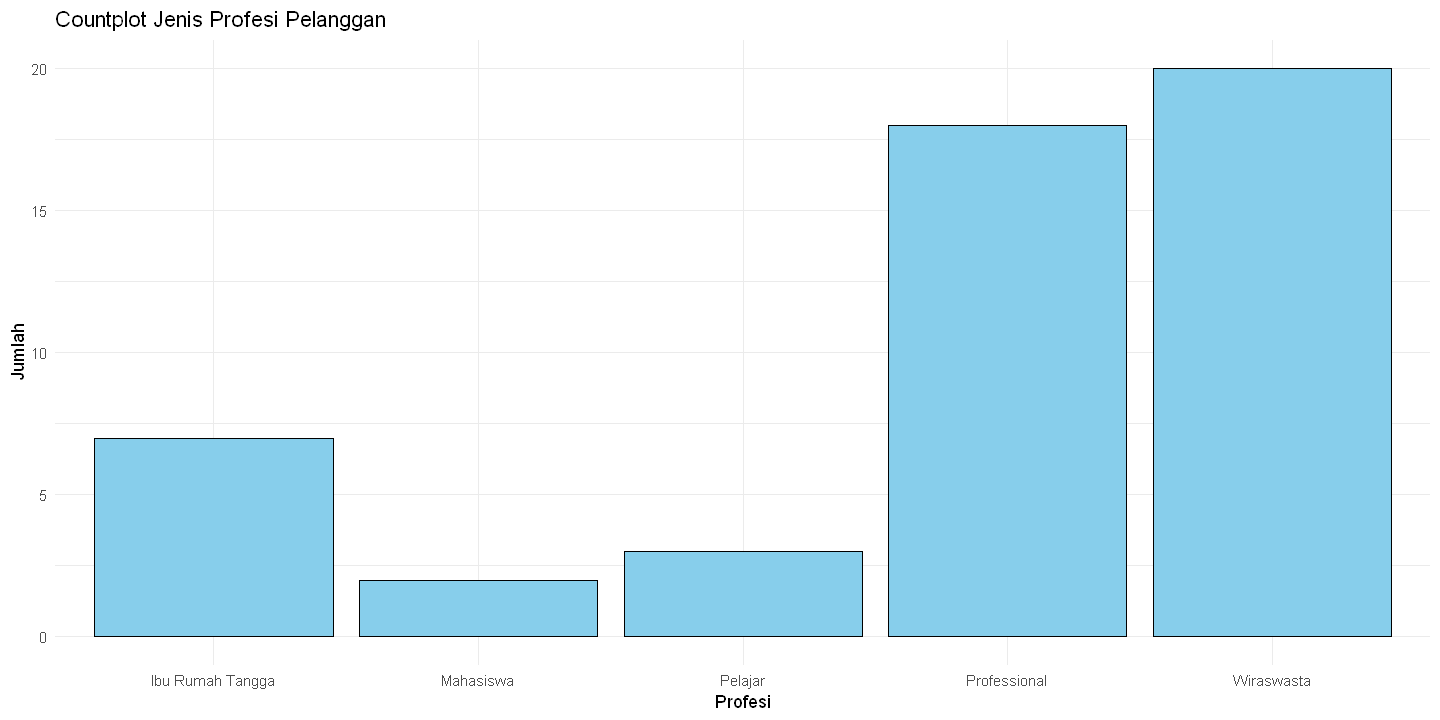

In [8]:
library(tidyverse)

options(repr.plot.width=12, repr.plot.height=6)
# Plot Jenis Kelamin
pelanggan %>%
  ggplot(aes(x = Profesi)) +
  geom_bar(fill = "skyblue", color = "black") +
  labs(title = "Countplot Jenis Profesi Pelanggan", x = "Profesi", y = "Jumlah") +
  theme_minimal()

Sebanyak 20 pelangan berprofesi sebagai pegawai swasta, kemudian Profesional sebanyak 16, Ibu Rumah Tangga sebanyak 7, Pelajar sebanyak 4 pelanggan, dan terakhir adalah mahasiswa sebanyak 2.

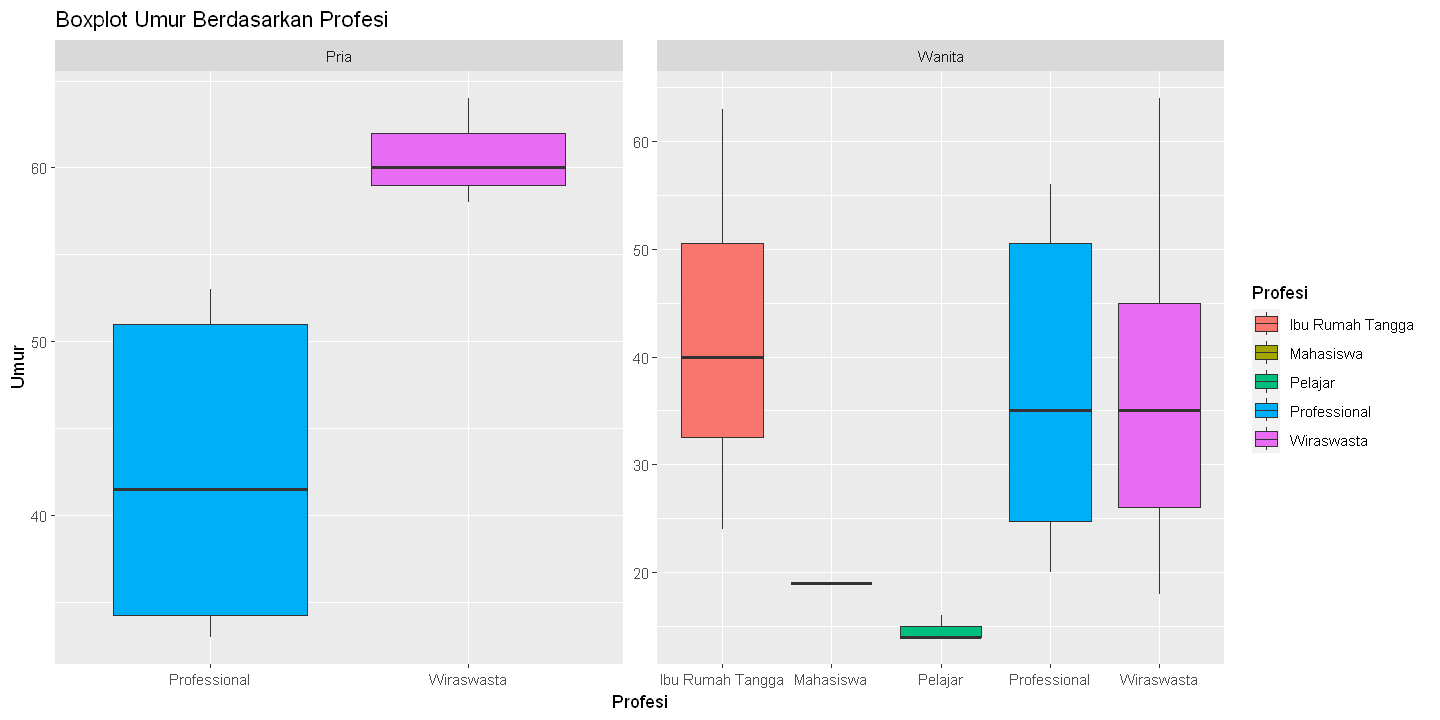

In [9]:
# Plotting Umur Pelanggan
library(ggplot2)
library(tidyverse)

# # Membuat boxplot umur berdasarkan jenis kelamin
# ggplot(pelanggan, aes(x = Profesi, y = Umur, fill = Profesi)) +
#   geom_boxplot() +
#   labs(title = "Boxplot Umur Berdasarkan Jenis Kelamin", x = "Jenis Kelamin", y = "Umur")

options(repr.plot.width=12, repr.plot.height=6)
# Memplot boxplot umur berdasarkan jenis kelamin dan profesi
pelanggan %>%
  ggplot(aes(x = Profesi, y = Umur, fill = Profesi)) +
  geom_boxplot() +
  labs(title = "Boxplot Umur Berdasarkan Profesi", x = "Profesi", y = "Umur") +
  facet_wrap(~ Jenis.Kelamin, scales = "free")

Data Profesi pria hanya terdapat 2 yaitu Profesional dengan rata-rata 42 tahun dan wiraswasta dengan rata-rata berumur 60 tahun. Sedangkan profesi wanita lebih bervariasi seperti Ibu Rumah Tangga dengan rata-rata berumur 40 tahun, Mahasiswa dengan rata-rata berumur 19 tahun, Pelajar dengan rata-rata berumur, Professional dengan rata-rata berumur 35 tahun, dan Wiraswasta dengan rata-rata berumur 35 tahun.

In [10]:
# Menghitung rata-rata NilaiBelanjaSetahun berdasarkan Profesi
rata_rata_per_profesi <- pelanggan %>%
  group_by(Profesi) %>%
  summarize(Rata_Rata_NilaiBelanja = mean(NilaiBelanjaSetahun))

# Menampilkan hasil rata-rata NilaiBelanjaSetahun per Profesi
rata_rata_per_profesi

Profesi,Rata_Rata_NilaiBelanja
<chr>,<dbl>
Ibu Rumah Tangga,5802199
Mahasiswa,3045350
Pelajar,2827133
Professional,5451321
Wiraswasta,10009124


####Preparation the Data for Machine Learning Algorithms

In [11]:
# Preparation the Data
pelanggan_matrix <- data.matrix(pelanggan[c("Jenis.Kelamin", "Profesi", "Tipe.Residen")])
head(pelanggan_matrix)

Jenis.Kelamin,Profesi,Tipe.Residen
1,5,2
2,3,1
1,4,1
1,4,1
2,5,1
2,4,1


In [12]:
# Menggabungkan hasil konversi
pelanggan <- data.frame(pelanggan, pelanggan_matrix)
head(pelanggan)

,Customer_ID,Nama.Pelanggan,Jenis.Kelamin,Umur,Profesi,Tipe.Residen,NilaiBelanjaSetahun,Jenis.Kelamin.1,Profesi.1,Tipe.Residen.1
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>
1,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927,1,5,2
2,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700,2,3,1
3,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429,1,4,1
4,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498,1,4,1
5,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206,2,5,1
6,CUST-006,Rosalina Kurnia,Wanita,24,Professional,Cluster,5215541,2,4,1


In [13]:
# Mengecek teks kategori dikonversi menjadi angka numerik berapa
unique(pelanggan[c("Profesi", "Profesi.1")])
unique(pelanggan[c("Jenis.Kelamin", "Jenis.Kelamin.1")])
unique(pelanggan[c("Tipe.Residen", "Tipe.Residen.1")])

,Profesi,Profesi.1
,<chr>,<int>
1,Wiraswasta,5
2,Pelajar,3
3,Professional,4
17,Ibu Rumah Tangga,1
31,Mahasiswa,2


,Jenis.Kelamin,Jenis.Kelamin.1
,<chr>,<int>
1,Pria,1
2,Wanita,2


,Tipe.Residen,Tipe.Residen.1
,<chr>,<int>
1,Sector,2
2,Cluster,1


Kelihatan kalau Wiraswasta dikonversi menjadi angka 5, Pelajar menjadi angka 3, Professional menjadi angka 4, Ibu Rumah Tangga menjadi angka 1, dan satu lagi adalah Mahasiswa yang dikonversi menjadi angka 2 (tidak terlihat disini).

Kita akan menormalisasikan NilaiBelanjaSetahun agar perhitungan lebih sederhana dan mudah dicerna, namun tidak mengurangi akurasi. karena ketika kolom ini digunakan untuk clustering, perhitungan sum of squared errors akan menjadi sangat besar

In [14]:
# Menormalisasikan Nilai Belanja
pelanggan$NilaiBelanjaSetahun <- pelanggan$NilaiBelanjaSetahun / 1000000
head(pelanggan)

,Customer_ID,Nama.Pelanggan,Jenis.Kelamin,Umur,Profesi,Tipe.Residen,NilaiBelanjaSetahun,Jenis.Kelamin.1,Profesi.1,Tipe.Residen.1
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<int>
1,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9.497927,1,5,2
2,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2.722700,2,3,1
3,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5.286429,1,4,1
4,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5.204498,1,4,1
5,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10.615206,2,5,1
6,CUST-006,Rosalina Kurnia,Wanita,24,Professional,Cluster,5.215541,2,4,1


####Membuat Data Master

In [15]:
#Membuat Data Master
Profesi <- unique(pelanggan[c("Profesi","Profesi.1")])
Jenis.Kelamin <- unique(pelanggan[c("Jenis.Kelamin","Jenis.Kelamin.1")])
Tipe.Residen <- unique(pelanggan[c("Tipe.Residen","Tipe.Residen.1")])

####MODELLING
Karena kita akan melakukan segmentasi pelanggan, maka kita akan mengclusterkan pelanggan yang dimana membagi pelanggan kedalam beberapa kelompok berdasarkan tingkat kemiripan antara satu pelanggan dengan yang lainnya. DIsini menggunakan algoritma machine learning K-Means untuk mengclusterkan pelanggan.

In [16]:
set.seed(100)

# Kolom yang digunakan
field_yang_digunakan <- c("Jenis.Kelamin.1", "Umur", "Profesi.1", "Tipe.Residen.1", "NilaiBelanjaSetahun")

segmentasi <- kmeans(x=pelanggan[field_yang_digunakan], centers=5, nstart=25)
segmentasi

K-means clustering with 5 clusters of sizes 5, 12, 14, 9, 10

Cluster means:
  Jenis.Kelamin.1     Umur Profesi.1 Tipe.Residen.1 NilaiBelanjaSetahun
1            1.40 61.80000  4.200000       1.400000            8.696132
2            1.75 31.58333  3.916667       1.250000            7.330958
3            2.00 20.07143  3.571429       1.357143            5.901089
4            2.00 42.33333  4.000000       1.555556            8.804791
5            1.70 52.50000  3.800000       1.300000            6.018321

Clustering vector:
 [1] 1 3 5 5 4 3 1 5 2 2 5 5 1 1 3 2 2 1 2 3 4 5 2 4 2 5 2 4 5 4 3 4 3 3 4 2 3 4
[39] 3 3 3 2 2 3 3 3 5 4 2 5

Within cluster sum of squares by cluster:
[1]  58.21123 174.85164 316.73367 171.67372 108.49735
 (between_SS / total_SS =  92.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

Terdapat 5 kelompok data yang telah dibagi ke dalam klaster berdasarkan beberapa kriteria.

Klaster pertama memiliki 5 data dengan rata-rata usia 61 tahun, dimana 40% dari mereka berjenis kelamin pria dan 60% berjenis kelamin wanita. Mayoritas dari kelompok ini adalah profesional atau pekerja swasta, dengan pengeluaran tahunan rata-rata sekitar 8.7 juta.

Klaster kedua terdiri dari 12 data dengan rata-rata usia 31 tahun, dimana mayoritas hampir semuanya berjenis kelamin wanita. Mayoritas dari mereka berprofesi sebagai profesional, dengan pengeluaran tahunan rata-rata sekitar 7.3 juta.

Klaster ketiga terdiri dari 14 data dengan rata-rata usia 20 tahun dan mayoritas berjenis kelamin wanita. Mayoritas dari mereka adalah pelajar atau profesional, dan mereka menghabiskan rata-rata belanja tahunan hampir mencapai 6 juta.

Klaster keempat terdiri dari 9 data dengan rata-rata usia 42 tahun, semuanya berjenis kelamin wanita, mayoritas dari mereka bekerja sebagai profesional, dan mereka memiliki pengeluaran tahunan rata-rata sebesar 8.8 juta.

Terakhir, klaster kelima memiliki 10 data dengan rata-rata usia 52 tahun, dimana mayoritas juga berjenis kelamin wanita. Sebagian besar dari kelompok ini berprofesi sebagai profesional dan memiliki pengeluaran tahunan sekitar 6 juta.



Analisa Hasil Model K Means:
*   Berdasarkan cluster, nilai 58.211228098358 adalah SS untuk cluster ke-1, nilai 174.851640331072 adalah SS untuk cluster ke-2, nilai 316.733666810598 adalah SS untuk cluster ke-3, nilai 171.673715890372 adalah SS untuk cluster ke-4, dan nilai 108.497347873209 adalah SS untuk cluster ke-5. Semakin kecil nilainya berpotensi semakin baik.
* total_SS: adalah SS untuk seluruh titik terhadap nilai rata-rata global, bukan untuk per cluster. Nilai ini selalu tetap dan tidak terpengaruh dengan jumlah cluster.
* between_SS: adalah total_SS dikurangi dengan jumlah nilai SS seluruh cluster.
* (between_SS / total_SS) adalah rasio antara between_SS dibagi dengan total_SS. Semakin besar persentasenya, umumnya semakin baik. Karena di sini rasionya cukup besar (92.4%), maka kemungkinan hasilnya akan semakin baik.




In [17]:
# Simulasi Jumlah Cluster dan SS
sse <- sapply(1:10, function(param_k) {kmeans(pelanggan[field_yang_digunakan], param_k, nstart=25)$tot.withinss})
sse

[1] 10990.9740  3016.5612  1550.8725  1064.4187   829.9676   625.1462
 [7]   508.1568   431.6977   374.1095   317.9424

Warning message:
"Continuous limits supplied to discrete scale.
i Did you mean `limits = factor(...)` or `scale_*_continuous()`?"


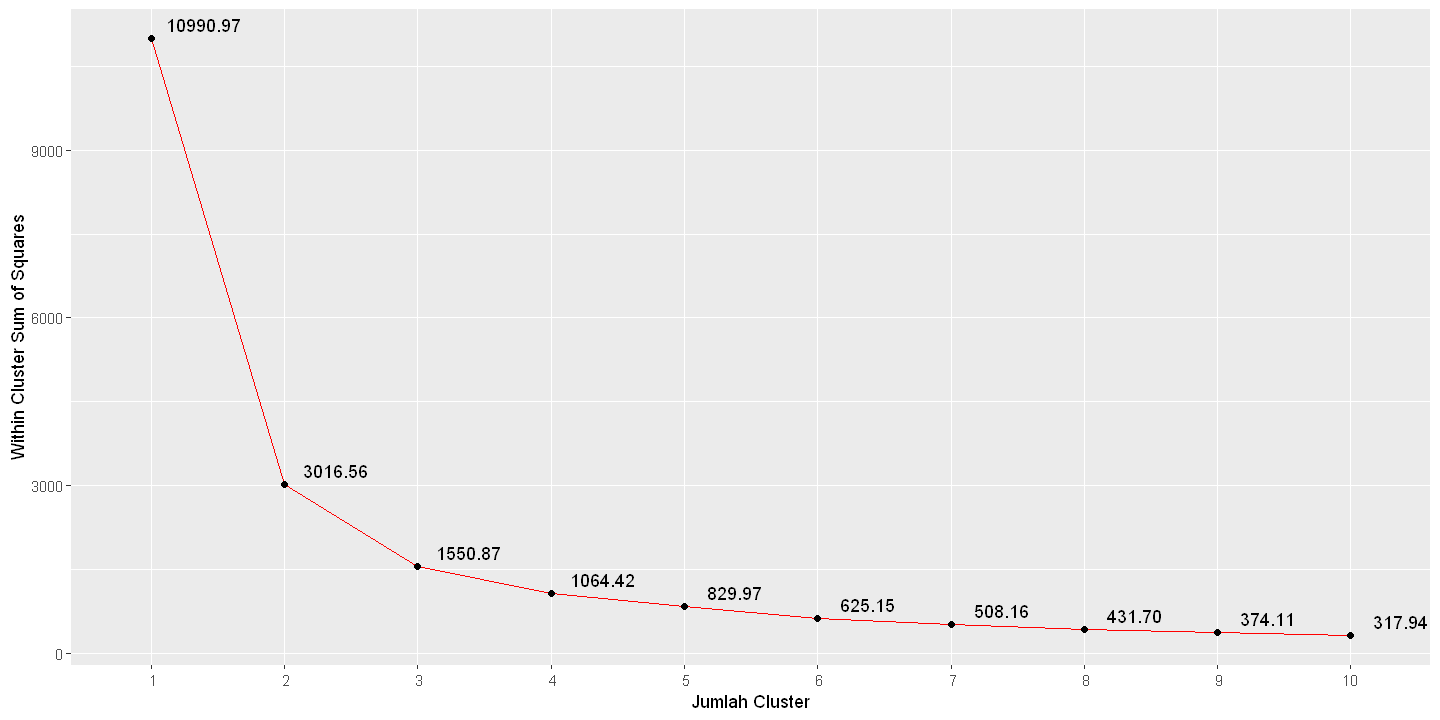

In [18]:
# Plot Sum of Squared Errors
jumlah_cluster_max <- 10
ssdata = data.frame(cluster=c(1:jumlah_cluster_max),sse)
ggplot(ssdata, aes(x=cluster,y=sse)) +
                geom_line(color="red") + geom_point() +
                ylab("Within Cluster Sum of Squares") + xlab("Jumlah Cluster") +
                geom_text(aes(label=format(round(sse, 2), nsmall = 2)),hjust=-0.2, vjust=-0.5) +
  scale_x_discrete(limits=c(1:jumlah_cluster_max))

Dari grafik yang kita hasilkan ini, kita melihat bahwa untuk cluster ke-1 hingga ke-2, penurunan nilai Sum of Squares nya lebih besar dari cluster-cluster lainnya, begitu juga untuk cluster ke 2–3. Namun, saat memasuki cluster 3–4 dan 4–5, penurunan nilai SSE nya tidak terlalu signifikan, sehingga dari grafik ini sudah terlihat jelas bahwa kita bisa memilih 4 atau 5 sebagai jumlah cluster optimal yang bisa kita pilih.

In [19]:
library(cluster)
library(ggplot2)

# Simulasi Jumlah Cluster dan SS
sse <- sapply(2:10, function(param_k) {
  km_model <- kmeans(pelanggan[field_yang_digunakan], param_k, nstart = 25)
  km_model$tot.withinss
})

# Menghitung Silhouette Score
silhouette_vals <- vector(mode = "numeric", length = 10)
for (i in 0:9) {
  km_model <- kmeans(pelanggan[field_yang_digunakan], i, nstart = 25)
  silhouette_vals[i] <- mean(silhouette(km_model$cluster, dist(pelanggan[field_yang_digunakan])))
}

# Plot Sum of Squared Errors (SSE)
jumlah_cluster_max <- 10
ssdata <- data.frame(cluster = 1:jumlah_cluster_max, sse = c(NA, sse))  # Menambahkan NA karena indeks dimulai dari 1
plot_sse <- ggplot(ssdata, aes(x = cluster, y = sse)) +
  geom_line(color = "red") +
  geom_point() +
  ylab("Within Cluster Sum of Squares") +
  xlab("Jumlah Cluster") +
  geom_text(aes(label = format(round(sse, 2), nsmall = 2)), hjust = -0.2, vjust = -0.5) +
  scale_x_continuous(breaks = seq(1, jumlah_cluster_max, 1))

# Plot Silhouette Score
plot_silhouette <- ggplot(data.frame(cluster = 2:10, silhouette_score = silhouette_vals), aes(x = cluster, y = silhouette_score)) +
  geom_line(color = "blue") +
  geom_point() +
  ylab("Silhouette Score") +
  xlab("Jumlah Cluster") +
  geom_text(aes(label = format(round(silhouette_score, 2), nsmall = 2)), hjust = -0.2, vjust = -0.5) +
  scale_x_continuous(breaks = seq(2, jumlah_cluster_max, 1))

# Menampilkan kedua plot dalam satu grid
library(gridExtra)
grid.arrange(plot_sse, plot_silhouette, nrow = 2)


ERROR: Error in library(cluster): there is no package called 'cluster'


In [20]:
# Menggabungkan hasil segmentasi ke data utama
pelanggan$cluster <- segmentasi$cluster
head(pelanggan[c("Customer_ID",	"Nama.Pelanggan",	"Jenis.Kelamin",	"Umur",	"Profesi",	"Tipe.Residen",	"NilaiBelanjaSetahun", "cluster")])

,Customer_ID,Nama.Pelanggan,Jenis.Kelamin,Umur,Profesi,Tipe.Residen,NilaiBelanjaSetahun,cluster
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<int>
1,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9.497927,1
2,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2.722700,3
3,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5.286429,5
4,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5.204498,5
5,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10.615206,4
6,CUST-006,Rosalina Kurnia,Wanita,24,Professional,Cluster,5.215541,3


In [21]:
# Melihat data pada cluster ke (Misal cluster 1)
pelanggan[which(pelanggan$cluster == 1),]

,Customer_ID,Nama.Pelanggan,Jenis.Kelamin,Umur,Profesi,Tipe.Residen,NilaiBelanjaSetahun,Jenis.Kelamin.1,Profesi.1,Tipe.Residen.1,cluster
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>
1,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9.497927,1,5,2,1
7,CUST-007,"Cahyono, Agus",Pria,64,Wiraswasta,Sector,9.837260,1,5,2,1
13,CUST-013,Cahaya Putri,Wanita,64,Wiraswasta,Cluster,9.333168,2,5,1,1
14,CUST-014,Mario Setiawan,Pria,60,Wiraswasta,Cluster,9.471615,1,5,1,1
18,CUST-018,Nelly Halim,Wanita,63,Ibu Rumah Tangga,Cluster,5.340690,2,1,1,1


#### Memberi nama segmen

Cluster 1 : Diamond Senior Member: alasannya adalah karena umurnya rata-rata adalah 61 tahun dan pembelanjaan di atas 8 juta.

Cluster 2 : Gold Young Professional: alasannya adalah karena umurnya rata-rata adalah 31 tahun, professional dan pembelanjaan cukup besar.

Cluster 3 : Silver Youth Gals: alasannya adalah karena umurnya rata-rata adalah 20, wanita semua, profesinya bercampur antar pelajar dan professional serta pembelanjaan sekitar 6 juta.

Cluster 4 : Diamond Profesional: alasannya adalah karena umurnya rata-rata adalah 42 tahun, pembelanjaan paling tinggi dan semuanya berprofesi professional.

Cluster 5 : Silver Mid Professional: alasannya adalah karena umurnya rata-rata adalah 52 tahun dan pembelanjaan sekitar 6 juta.


In [22]:
# Memberi nama segmen
Segmen.Pelanggan <- data.frame(cluster = c(1, 2, 3, 4, 5),
                                Nama.Segmen = c("Diamond Senior Member",
                                                "Gold Young Professional",
                                                "Silver Youth Gals",
                                                "Diamond Professional",
                                                "Silver Mid Professional"))
Segmen.Pelanggan

cluster,Nama.Segmen
<dbl>,<chr>
1,Diamond Senior Member
2,Gold Young Professional
3,Silver Youth Gals
4,Diamond Professional
5,Silver Mid Professional


In [23]:
#Menggabungkan seluruh aset ke dalam variable Identitas.Cluster
Identitas.Cluster <- list(Profesi=Profesi, Jenis.Kelamin=Jenis.Kelamin,
                          Tipe.Residen=Tipe.Residen, Segmentasi=segmentasi,
                          Segmen.Pelanggan=Segmen.Pelanggan,
                          field_yang_digunakan=field_yang_digunakan)

In [24]:
# Menyimpan Objek dalam Bentuk File
saveRDS(Identitas.Cluster, "cluster.rds")

### Mengoperasionalkan Model K-Means

In [25]:
# Data Baru
databaru <- data.frame(Customer_ID="CUST-100",
                       Nama.Pelanggan="Rudi Wilamar",
                       Umur=20,
                       Jenis.Kelamin="Pria",
                       Profesi="Pelajar",
                       Tipe.Residen="Cluster",
                       NilaiBelanjaSetahun=3.5)
databaru

Customer_ID,Nama.Pelanggan,Umur,Jenis.Kelamin,Profesi,Tipe.Residen,NilaiBelanjaSetahun
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
CUST-100,Rudi Wilamar,20,Pria,Pelajar,Cluster,3.5


In [26]:
# Memuat Objek Clustering dari File
Identitas.Cluster <- readRDS(file="cluster.rds")
Identitas.Cluster

$Profesi
            Profesi Profesi.1
1        Wiraswasta         5
2           Pelajar         3
3      Professional         4
17 Ibu Rumah Tangga         1
31        Mahasiswa         2

$Jenis.Kelamin
  Jenis.Kelamin Jenis.Kelamin.1
1          Pria               1
2        Wanita               2

$Tipe.Residen
  Tipe.Residen Tipe.Residen.1
1       Sector              2
2      Cluster              1

$Segmentasi
K-means clustering with 5 clusters of sizes 5, 12, 14, 9, 10

Cluster means:
  Jenis.Kelamin.1     Umur Profesi.1 Tipe.Residen.1 NilaiBelanjaSetahun
1            1.40 61.80000  4.200000       1.400000            8.696132
2            1.75 31.58333  3.916667       1.250000            7.330958
3            2.00 20.07143  3.571429       1.357143            5.901089
4            2.00 42.33333  4.000000       1.555556            8.804791
5            1.70 52.50000  3.800000       1.300000            6.018321

Clustering vector:
 [1] 1 3 5 5 4 3 1 5 2 2 5 5 1 1 3 2 2 1 2 3 4 5 2 4

In [27]:
# Merge dengan Data Referensi
databaru <- merge(databaru, Identitas.Cluster$Profesi)
databaru <- merge(databaru, Identitas.Cluster$Jenis.Kelamin)
databaru <- merge(databaru, Identitas.Cluster$Tipe.Residen)
databaru

Tipe.Residen,Jenis.Kelamin,Profesi,Customer_ID,Nama.Pelanggan,Umur,NilaiBelanjaSetahun,Profesi.1,Jenis.Kelamin.1,Tipe.Residen.1
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>
Cluster,Pria,Pelajar,CUST-100,Rudi Wilamar,20,3.5,3,1,1


In [28]:
#menentukan data baru di cluster mana

which.min(sapply( 1:5, function( x ) sum( (
  databaru[Identitas.Cluster$field_yang_digunakan] -
      Identitas.Cluster$Segmentasi$centers[x,])^2 ) ))
      Identitas.Cluster$Segmen.Pelanggan[which.min(sapply( 1:5, function( x )
        sum( ( databaru
                 [Identitas.Cluster$field_yang_digunakan] -
                            Identitas.Cluster$Segmentasi$centers[x,])^2
                              ) )),]

[1] 3

,cluster,Nama.Segmen
,<dbl>,<chr>
3,3,Silver Youth Gals


Data baru yang telah masuk ternyata masuk ke dalam kelompok Silver Youth Gals